#### การหาค่าผิดปกติในข้อมูลด้วยวิธี IQR (Interquartile Range)

##### 1. Import libraries

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### 2. Load DataSets

In [27]:
df = pd.read_csv('datasets/outlier_univar.csv')

df

,Name,Age,Buy,Section
0,Kobkiat,25,18.0,1
1,Ninan,22,16.0,1
2,John,25,11.5,2
3,Tim,35,10.5,2
4,Steal,28,17.0,1
5,Mark,28,16.0,2
6,Dang,23,31.0,1
7,Bash,26,1.0,2
8,White,25,60.0,1
9,Bob,28,21.0,2


In [28]:
# Check type of data
df.dtypes

Name        object
Age          int64
Buy        float64
Section      int64
dtype: object

##### 3. Change "Section" to category type

In [29]:
df.Section = df.Section.astype('category')

df.dtypes

Name         object
Age           int64
Buy         float64
Section    category
dtype: object

In [30]:
# ตรวจสอบค่าสถิติของ datasets
df.describe()

,Age,Buy
count,10.00000,10.000000
mean,26.50000,20.200000
std,3.62859,15.951663
min,22.00000,1.000000
25%,25.00000,12.625000
50%,25.50000,16.500000
75%,28.00000,20.250000
max,35.00000,60.000000


##### 4. Data Visualization

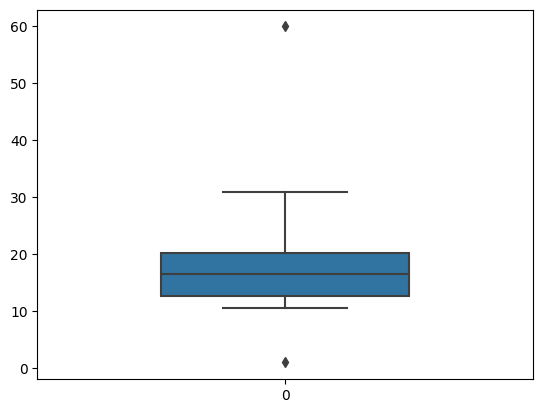

In [31]:
#df.boxplot('Buy') # plot with pandas
sns.boxplot(df.Buy, width=0.5) # plot with seaborn
plt.show()

##### 5. คำนวณหา Outliers ด้วยวิธี IQR

In [32]:
# IQR = Q3 - Q1
# ค่าบน = Q3 + 1.5 * IQR
# ค่าล่าง = Q1 - 1.5 * IQR

# หา q3 และ q1
q3 = df.Buy.quantile(0.75)
q1 = df.Buy.quantile(0.25)

# หา IQR
iqr = q3 - q1

# หาค่าบน
upper = q3 + 1.5 * iqr

# หาค่าล่าง
lower = q1 - 1.5 * iqr

# แสดงผล
print('q3 =', q3)
print('q1 =', q1)
print('iqr =', iqr)
print('upper =', upper)
print('lower =', lower)


q3 = 20.25
q1 = 12.625
iqr = 7.625
upper = 31.6875
lower = 1.1875


##### 6. กำจัดค่าผิดปกติเหนือขอบเขตบน

In [33]:
# ดูข้อมูลที่อยู่เหนือขอบเขตบน
print(df[df.Buy > upper])

# นับจำนวนข้อมูลที่อยู่เหนือขอบเขตบน
print(df[df.Buy > upper].Buy.count())

# การลบข้อมูลที่ผิดปกติเหนือขอบเขตบนออกไป
df.drop(df[df.Buy > upper].index, inplace=True)

df

    Name  Age   Buy Section
8  White   25  60.0       1
1


,Name,Age,Buy,Section
0,Kobkiat,25,18.0,1
1,Ninan,22,16.0,1
2,John,25,11.5,2
3,Tim,35,10.5,2
4,Steal,28,17.0,1
5,Mark,28,16.0,2
6,Dang,23,31.0,1
7,Bash,26,1.0,2
9,Bob,28,21.0,2


##### 7. กำจัดค่าผิดปกติเหนือขอบล่าง

In [34]:
# ดูข้อมูลที่อยู่เหนือขอบเขตล่าง
print(df[df.Buy < lower])

# นับจำนวนข้อมูลที่อยู่เหนือขอบเขตล่าง
print(df[df.Buy < lower].Buy.count())

# การลบข้อมูลที่ผิดปกติเหนือขอบเขตล่างออกไป
df.drop(df[df.Buy < lower].index, inplace=True)

df

   Name  Age  Buy Section
7  Bash   26  1.0       2
1


,Name,Age,Buy,Section
0,Kobkiat,25,18.0,1
1,Ninan,22,16.0,1
2,John,25,11.5,2
3,Tim,35,10.5,2
4,Steal,28,17.0,1
5,Mark,28,16.0,2
6,Dang,23,31.0,1
9,Bob,28,21.0,2


##### 8. สรุปการกรองข้อมูลที่ผิดปกติทั้งขอบเขตบนและขอบเขตล่าง

In [39]:
# นับว่ามีข้อมูลที่น่าจะผิดปกติกี่รายการ
df[(df.Buy < lower) | (df.Buy > upper)].count()

# กรองไว้เฉพาะที่ปกติ
df[(df.Buy <= upper) & (df.Buy >= lower)]

# บันทึกไฟล์ to csv
df.to_csv('datasets/outlier_iqr_clean.csv', index=False)

# บันทึกไฟล์ to excel
df.to_excel('datasets/outlier_iqr_clean.xlsx', index=False)
